Packages Import

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

Load Dataset

In [46]:
mat = pd.read_csv('student-mat.csv', sep=';')
por = pd.read_csv('student-por.csv', sep=';')

Data Preparation

In [47]:
# Merge datasets
df = pd.concat([mat, por])
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [48]:
# rename column labels
df.columns = ['school', 'sex', 'age', 'address', 'family_size',  'parents_status',
             'mother_education', 'father_education', 'mother_job', 'father_job', 'reason', 'guardian', 'commute_time', 'study_time', 'failures', 'school_support',
              'family_support', 'paid_classes', 'activities', 'nursery','desire_higher_edu',
             'internet', 'romantic','family_quality', 'free_time', 'go_out', 'weekday_alcohol_usage', 'weekend_alochol_usage',
             'health', 'absences', 'period1_score','period2_score', 'final_score']

In [49]:
# converting final_score to categorical variable # Good:15-20, Fair:10-14, poor:0-9

df['final_grade'] = 'na'
df.loc[(df.final_score >=15) & (df.final_score <=20), 'final_grade'] = 'Good'
df.loc[(df.final_score >=10) & (df.final_score <=14), 'final_grade'] = 'Fair'
df.loc[(df.final_score >=0) & (df.final_score <=9), 'final_grade'] = 'Poor'

df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alochol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Fair


In [50]:
# look for any missing values
df.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alochol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

There is no missing values

EDA -Exploration Data Analysis

Text(0, 0.5, 'No of std')

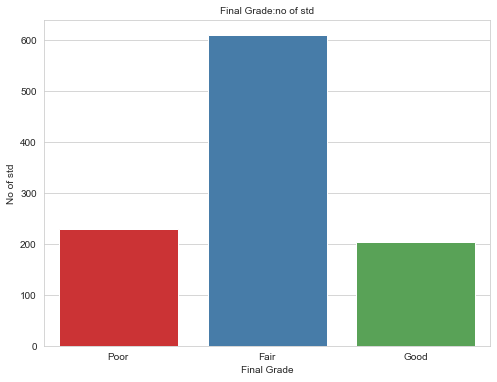

In [51]:
# Final Grade countplot

plt.figure(figsize=(8,6))
sns.countplot(df.final_grade, order=["Poor", "Fair", "Good"], palette='Set1')
plt.title('Final Grade:no of std', fontsize=10)
plt.xlabel('Final Grade', fontsize=10)
plt.ylabel('No of std', fontsize=10)

Correlation HeatMap

Text(0.5, 1, 'Correlation Heatmap')

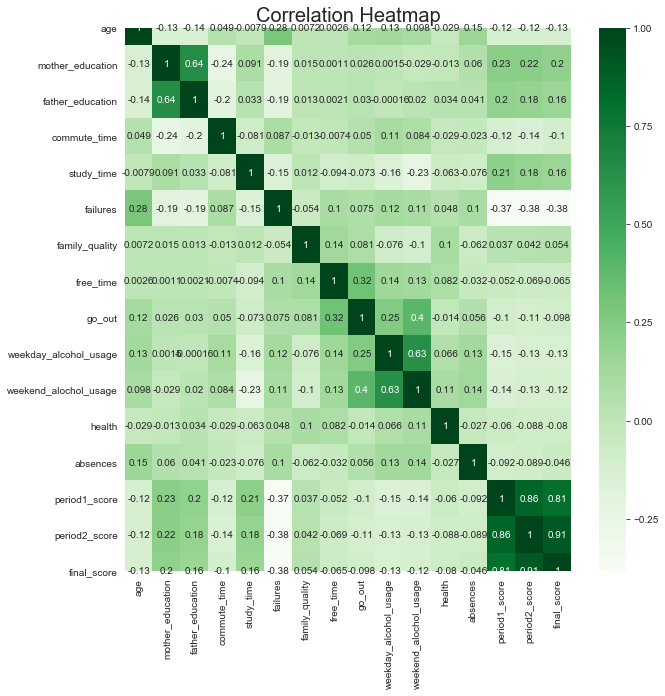

In [52]:
#see correlation between variables through a correlation heatemap

corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title('Correlation Heatmap', fontsize=20)

FINAL GRADE BY ROMANTIC STATUS
see how students in a  romantic relationship vs those not in a relationship perform

In [53]:
# romantic status
perc = (lambda col:col/col.sum())
index = ['poor', 'fair', 'good']
romance_tab1 = pd.crosstab(index=df.final_grade, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)

<Figure size 432x288 with 0 Axes>

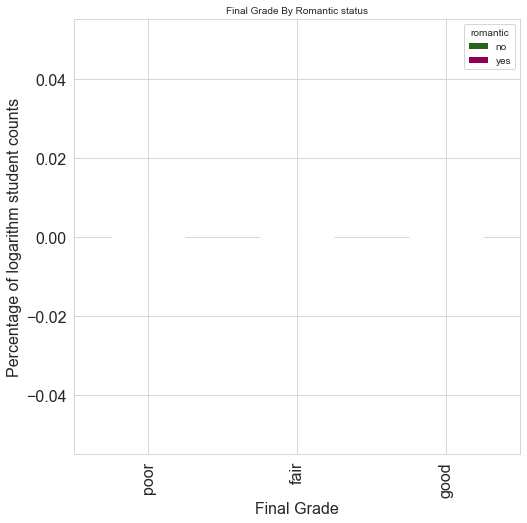

In [54]:
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r",  fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic status', fontsize=10)
plt.ylabel('Percentage of logarithm student counts', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

Hypothesis Testing confirmed, romantic status has a significant correlation with final grade

In [55]:
# chi-square test result --significant!

import statsmodels.api as sm

romance_table = sm.stats.Table(romance_tab1)
romance_rslt = romance_table.test_nominal_association()
romance_rslt.pvalue

0.038810128743959726

Final Grade By Alcohol Consumption

See how alcohol consumption influences student final grade

In [56]:
# weekend alcohol consumption

alc_tab1 = pd.crosstab(index=df.final_grade, columns=df.weekend_alochol_usage)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)


C:\Users\bayya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bayya\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'Level of alcohol consumption')

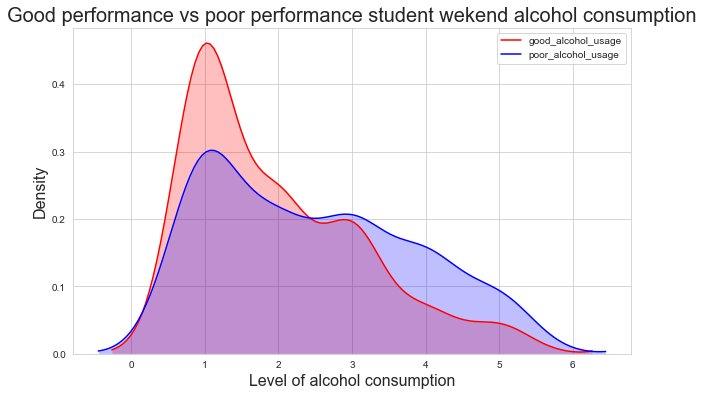

In [57]:
# create good student dataframe
good = df.loc[df.final_grade == 'Good']
good['good_alcohol_usage']=good.weekend_alochol_usage

#create poor student datafram

poor= df.loc[df.final_grade == 'Poor']
poor['poor_alcohol_usage']=poor.weekend_alochol_usage
             
# Plot

plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['good_alcohol_usage'], shade=True, color="r")
p1=sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="b")

plt.title('Good performance vs poor performance student wekend alcohol consumption', fontsize=20)

plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of alcohol consumption', fontsize=16)


Text(0.5, 0, 'Final grade')

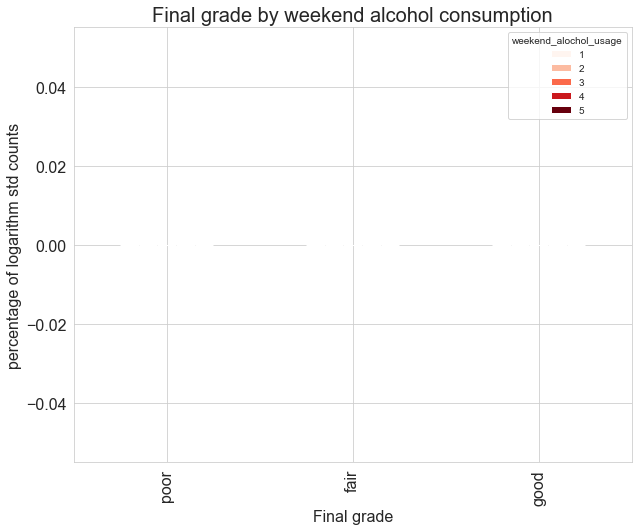

In [58]:
alc_perc.plot.bar(colormap='Reds', figsize=(10,8), fontsize=16)
plt.title('Final grade by weekend alcohol consumption', fontsize=20)
plt.ylabel('percentage of logarithm std counts', fontsize=16)
plt.xlabel('Final grade', fontsize=16)

Hyphothesis Testing confirmed, weekend alcohol consumption has a significant correlation with final grade


In [59]:
# chi-square test result

import statsmodels.api as sm

alc_table = sm.stats.Table(alc_tab1)
alc_rslt = alc_table.test_nominal_association()
alc_rslt.pvalue

0.007592294056368298

Final Grade By Parents Education Level

In [60]:
good['good_student_father_education'] = good.father_education
poor['poor_student_father_education'] = poor.father_education
good['good_student_mother_education'] = good.mother_education
poor['poor_student_mother_education'] = poor.mother_education

C:\Users\bayya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\bayya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\bayya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

 see the difference between good and poor performer' father education leve (numeric: from 1 very low to 5 - very high)

Text(0.5, 0, 'Father education level')

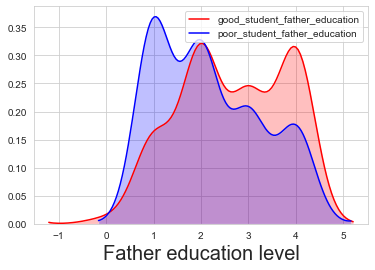

In [61]:
plt.figure(figsize=(6,4))
p2=sns.kdeplot(good['good_student_father_education'], shade=True, color='r')
p2=sns.kdeplot(poor['poor_student_father_education'], shade=True, color='b')
plt.xlabel('Father education level', fontsize=20)

see the difference between good and poor performance mother education level (numeric : from 1 - very low to 5 to very high)

Text(0.5, 0, 'mother education level')

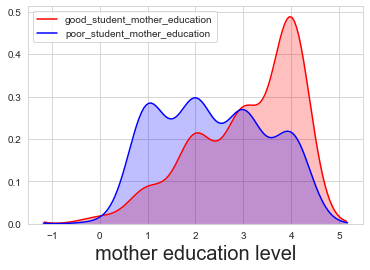

In [62]:
plt.figure(figsize=(6,4))
p3 = sns.kdeplot(good['good_student_mother_education'], shade=True, color='r')

p3 = sns.kdeplot(poor['poor_student_mother_education'], shade=True, color='b')

plt.xlabel('mother education level', fontsize=20)

OLS (ordinary least square) tells that parents education level has a positive correlation
with students final score. Comparatively, monther education level has bigger influence that father education level

In [63]:
# Us ols to see coefficients

x_edu = df[['mother_education', 'father_education']]
y_edu = df.final_score
edu = sm.OLS(y_edu, x_edu)
results_edu = edu.fit()
results_edu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            final_score   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.814
Method:                 Least Squares   F-statistic:                              2287.
Date:                Fri, 22 Nov 2019   Prob (F-statistic):                        0.00
Time:                        17:46:41   Log-Likelihood:                         -3194.8
No. Observations:                1044   AIC:                                      6394.
Df Residuals:                    1042   BIC:                                      6403.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
mother_education     2.4078      0.166     14.527      0.000       2.083       2.733
father_education     1.5746      0.179      8.806      0.000       1.224       1.926
==============================================================================
Omnibus:                       35.858   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.773
Skew:                          -0.427   Prob(JB):                     2.31e-09
Kurtosis:                       3.430   Cond. No.                         5.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Final Grade by Frequency of going out


Text(0.5, 0, 'Frequency of going out')

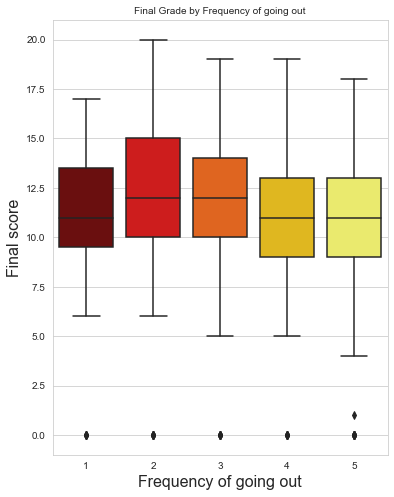

In [64]:
# Going out with friends (numeric from 1 - very low to 5 -very hight)

plt.figure(figsize=(6,8))

sns.boxplot(x = 'go_out', y='final_score', data=df, palette='hot')

plt.title('Final Grade by Frequency of going out', fontsize=10)
plt.ylabel('Final score', fontsize=16)
plt.xlabel('Frequency of going out', fontsize=16)

Text(0.5, 0, 'Final Grade')

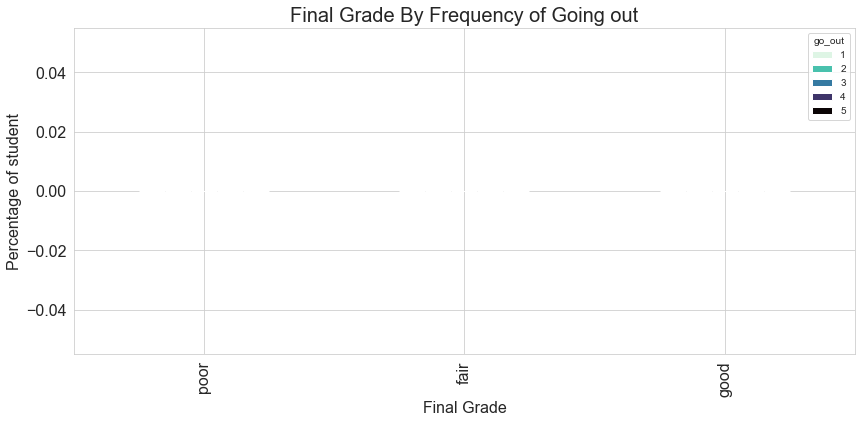

In [65]:
out_tab = pd.crosstab(index=df.final_grade, columns=df.go_out)
out_perc= out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap='mako_r', fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going out', fontsize=20)
plt.ylabel('Percentage of student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

Final Grade By Living Area


In [66]:
# living area : Urban vs Rural
df.address = df.address.map({'U' : 'Urban', 'R':'Rural'})

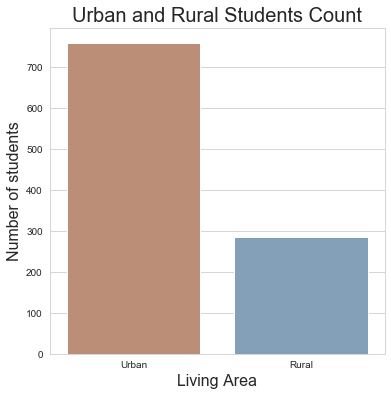

In [67]:
plt.figure(figsize=(6,6))
sns.countplot(df.address, palette='twilight_shifted_r')
plt.title('Urban and Rural Students Count', fontsize=20)
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number of students', fontsize=16)
plt.show()

In [68]:
ad_tab1 = pd.crosstab(index=df.final_grade, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)

Text(0.5, 0, 'Final Grade')

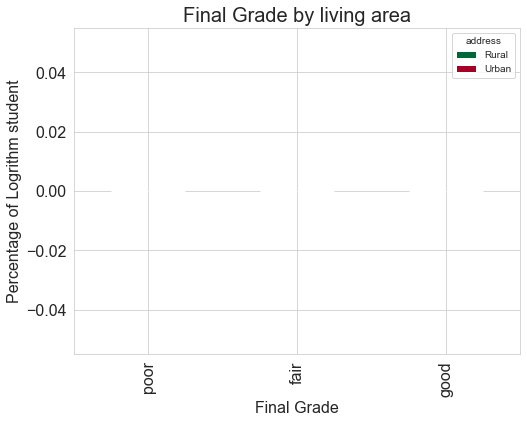

In [69]:
ad_perc.plot.bar(colormap='RdYlGn_r', fontsize=16, figsize=(8,6))
plt.title("Final Grade by living area", fontsize=20)
plt.ylabel("Percentage of Logrithm student", fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

Classification

Use Students information to predict their FianlGrade



Preprate Dataset for Modelling

In [70]:
# create dataframe dfd for classification

dfd = df.copy()
dfd.head()


,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alochol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,Urban,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Poor
1,GP,F,17,Urban,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Poor
2,GP,F,15,Urban,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Fair
3,GP,F,15,Urban,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Good
4,GP,F,16,Urban,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Fair


In [71]:
#dfd = dfd.drop(['final_grade'], axis=1)
#dfd.head()

In [72]:
# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.final_grade)

dfd.final_grade.head(10)

0    2
1    2
2    0
3    1
4    0
5    1
6    0
7    2
8    1
9    1
Name: final_grade, dtype: int32

In [73]:
# data set train_test_split
from sklearn.model_selection import train_test_split
x = dfd.drop('final_grade', axis=1)
y = dfd.final_grade

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [74]:
# get dummy variables , pd.get_dummies convert categorical variable into dummy/indicator variables
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)


In [75]:
# see total number of features
len(list(x_train))

59

Decision Tree Classification

In [76]:
# Find the optimal # of minimum samples leaf

from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,58):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(x_train, y_train)
    ts=t.score(x_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
49    1.0
50    1.0
51    1.0
52    1.0
53    1.0
54    1.0
55    1.0
56    1.0
dtype: float64

In [77]:
# final model
tree = DecisionTreeClassifier(min_samples_leaf=17)
t = tree.fit(x_train, y_train)
print("Decision tree model score", ":", t.score(x_train, y_train), ",", "Cross validation score", ":", t.score(x_test, y_test))

Decision tree model score : 1.0 , Cross validation score : 1.0


Random Forest Classification

In [78]:
# Find a good # of estimators
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1, 58):
    forest = RandomForestClassifier()
    f = forest.fit(x_train, y_train)
    fs = f.score(x_train, y_train)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

C:\Users\bayya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bayya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bayya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bayya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bayya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\Users\bayya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bayya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bayya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bayya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bayya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

0     1.0
1     1.0
2     1.0
3     1.0
6     1.0
7     1.0
8     1.0
13    1.0
14    1.0
15    1.0
17    1.0
18    1.0
21    1.0
22    1.0
23    1.0
25    1.0
27    1.0
28    1.0
29    1.0
31    1.0
33    1.0
34    1.0
35    1.0
36    1.0
38    1.0
41    1.0
42    1.0
45    1.0
46    1.0
47    1.0
48    1.0
51    1.0
52    1.0
53    1.0
55    1.0
dtype: float64

In [79]:
# find a good # of min_samples_leaf
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=i)
    f = forest.fit(x_train, y_train)
    fs = f.score(x_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

2    0.987261
dtype: float64

In [80]:
# final model
forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=2)
f = forest.fit(x_train, y_train)
print("Random Forest Model Score", ":", f.score(x_train, y_train), ";",
     "Cross Validation Score", ":", f.score(x_test, y_test))

Random Forest Model Score : 1.0 ; Cross Validation Score : 0.9745222929936306


Support Vector Classification

In [83]:
from sklearn.svm import SVC
svc =SVC()
s =svc.fit(x_train, y_train)
print("SVC Model Score", ":", s.score(x_train, y_train), ",",
     "Cross Validation Score", ":", s.score(x_test, y_test))

SVC Model Score : 0.989041095890411 , Cross Validation Score : 0.9363057324840764


C:\Users\bayya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg', fit_intercept=True)

In [90]:
# find optimal # of features to use in the model
from sklearn.feature_selection import SelectKBest, chi2

ks=[]
for i in range(1, 58):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(x_train, y_train)
    x_new_test = sk.fit_transform(x_test, y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)
ks = pd.Series(ks)
ks = ks.reindex(list(range(1, 58)))
ks

1     0.993631
2     0.993631
3     0.993631
4     0.993631
5     0.993631
6     0.993631
7     0.213376
8     1.000000
9     0.799363
10    0.611465
11    0.796178
12    0.993631
13    0.783439
14    0.783439
15    0.710191
16    0.990446
17    0.990446
18    0.993631
19    0.719745
20    0.716561
21    0.719745
22    0.716561
23    0.993631
24    0.993631
25    0.990446
26    0.993631
27    0.990446
28    0.993631
29    0.993631
30    0.993631
31    0.990446
32    0.987261
33    0.875796
34    0.869427
35    0.869427
36    0.984076
37    0.866242
38    0.984076
39    0.987261
40    0.990446
41    0.987261
42    0.213376
43    0.213376
44    0.987261
45    0.984076
46    0.859873
47    0.856688
48    0.853503
49    0.866242
50    0.869427
51    0.869427
52    0.869427
53    0.996815
54    0.993631
55    0.990446
56    0.993631
57         NaN
dtype: float64


Text(0, 0.5, 'Prediction accuracy')

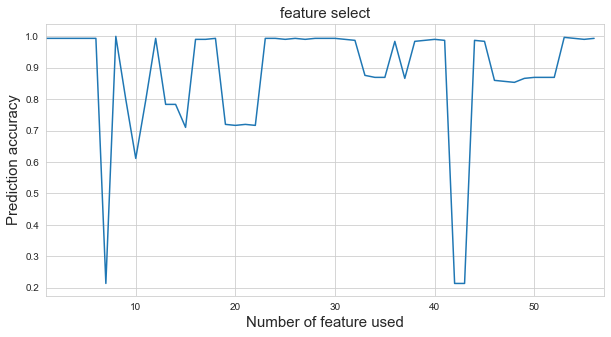

In [91]:
plt.figure(figsize=(10,5))
ks.plot.line()
plt.title("feature select", fontsize=15)
plt.xlabel("Number of feature used", fontsize=15)
plt.ylabel("Prediction accuracy", fontsize=15)

In [92]:
ks.where(ks==ks.max()).dropna()

8    1.0
dtype: float64

Ada Boost Classification

In [95]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=2)
af = ada.fit(x_train, y_train)
print("Ada Boost Model Score", ":", af.score(x_train, y_train),",",
     "cross validation score", ":", af.score(x_test, y_test))

Ada Boost Model Score : 1.0 , cross validation score : 1.0


Stochastic Gradient Descent Classification 

In [97]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sf = sgd.fit(x_train, y_train)
print("Stochastic Gradient Descent Model Score", ":", sf.score(x_train, y_train), ",",
     "Cross Validation Score", ":", sf.score(x_test, y_test))

Stochastic Gradient Descent Model Score : 0.9191780821917809 , Cross Validation Score : 0.8980891719745223
